# Importación de Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Análisis Exploratorio de Datos

In [2]:
data = pd.read_csv(r'C:\Users\lfsoto\Documents\Aprendizaje de Maquinas\Proyecto Final\89cement data .csv')
data.head()

,Month,Production,Sales,demand,population,gdp,disbusment,interestrate,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Jan-10,347.0,322.0,346.0,122.4,182277.0,60314.00,10.25,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-10,306.0,285.0,338.0,122.5,181018.0,61213.92,10.33,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-10,236.0,245.0,276.0,122.6,179759.0,62113.83,10.42,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-10,234.0,212.0,245.0,122.8,178500.0,63013.75,10.50,NaN,NaN,NaN,NaN,NaN,NaN
4,May-10,296.0,289.0,312.0,122.9,177354.0,63913.67,10.58,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         155 non-null    object 
 1   Production    155 non-null    float64
 2   Sales         155 non-null    float64
 3   demand        155 non-null    float64
 4   population    155 non-null    float64
 5   gdp           155 non-null    float64
 6   disbusment    155 non-null    float64
 7   interestrate  155 non-null    float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(13), object(1)
memory usage: 109.4+ KB


In [4]:
columanas_eliminar = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']
df = data.copy()
df = df.drop(columns=columanas_eliminar)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         155 non-null    object 
 1   Production    155 non-null    float64
 2   Sales         155 non-null    float64
 3   demand        155 non-null    float64
 4   population    155 non-null    float64
 5   gdp           155 non-null    float64
 6   disbusment    155 non-null    float64
 7   interestrate  155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 62.6+ KB


In [6]:
df = df.dropna(subset=['Month'])
df.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         155 non-null    object 
 1   Production    155 non-null    float64
 2   Sales         155 non-null    float64
 3   demand        155 non-null    float64
 4   population    155 non-null    float64
 5   gdp           155 non-null    float64
 6   disbusment    155 non-null    float64
 7   interestrate  155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.9+ KB


In [7]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')

In [8]:
df.head()

,Month,Production,Sales,demand,population,gdp,disbusment,interestrate
0,2010-01-01,347.0,322.0,346.0,122.4,182277.0,60314.00,10.25
1,2010-02-01,306.0,285.0,338.0,122.5,181018.0,61213.92,10.33
2,2010-03-01,236.0,245.0,276.0,122.6,179759.0,62113.83,10.42
3,2010-04-01,234.0,212.0,245.0,122.8,178500.0,63013.75,10.50
4,2010-05-01,296.0,289.0,312.0,122.9,177354.0,63913.67,10.58


In [9]:
df = df.sort_values('Month')
df.reset_index(drop=True, inplace=True)


In [10]:
df = df.rename(columns={'Sales ': 'Sales'})


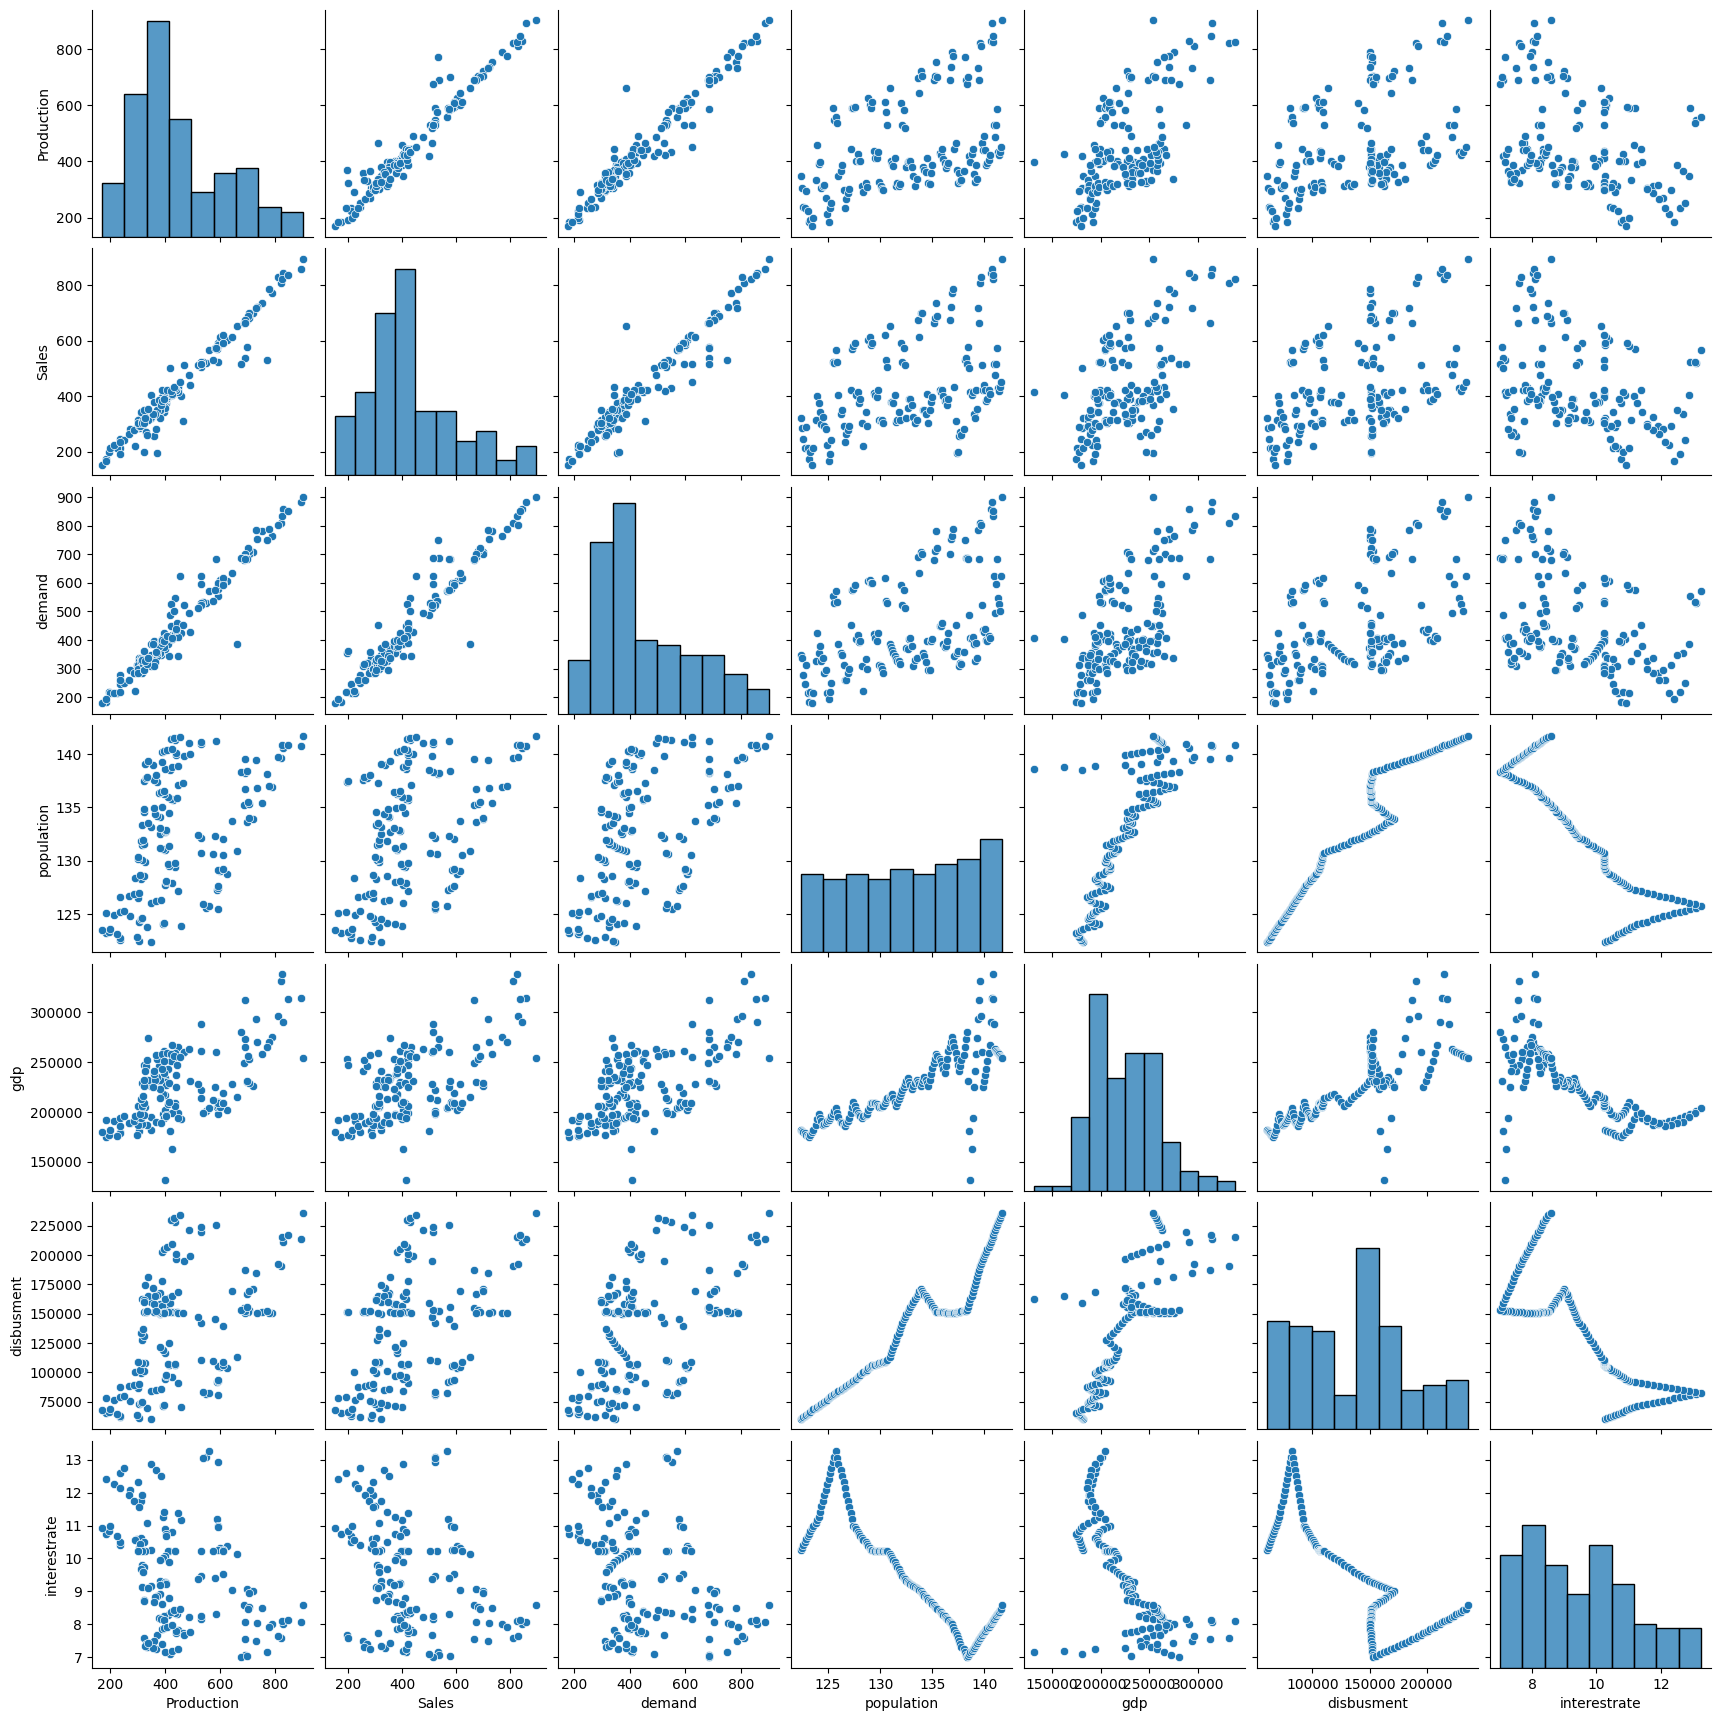

In [11]:
sns.pairplot(df)

## Análisis General del Pairplot

Se observa que hay relaciones lineales claras y fuertes entre:

- Production y Sales
- Production y Demand
- Sales y Demand

Analisis de variables económicas vs demanda
- gdp (PIB):
Muestra una tendencia creciente respecto a demand, aunque no estrictamente lineal.
- population:
Tiene un patrón casi lineal creciente con demand, lo cual es lógico pues a mayor población, debería ser mayor la demanda de cemento.
- disbursement:
También tiene una relación creciente, aunque con más dispersión.
- interest_rate:
Parece tener una relación inversa con demand, aunque con bastante ruido.

Analisis de Distribuciones 
- Production, Sales, Demand tienen distribuciones asimétricas hacia la derecha (sesgo positivo).


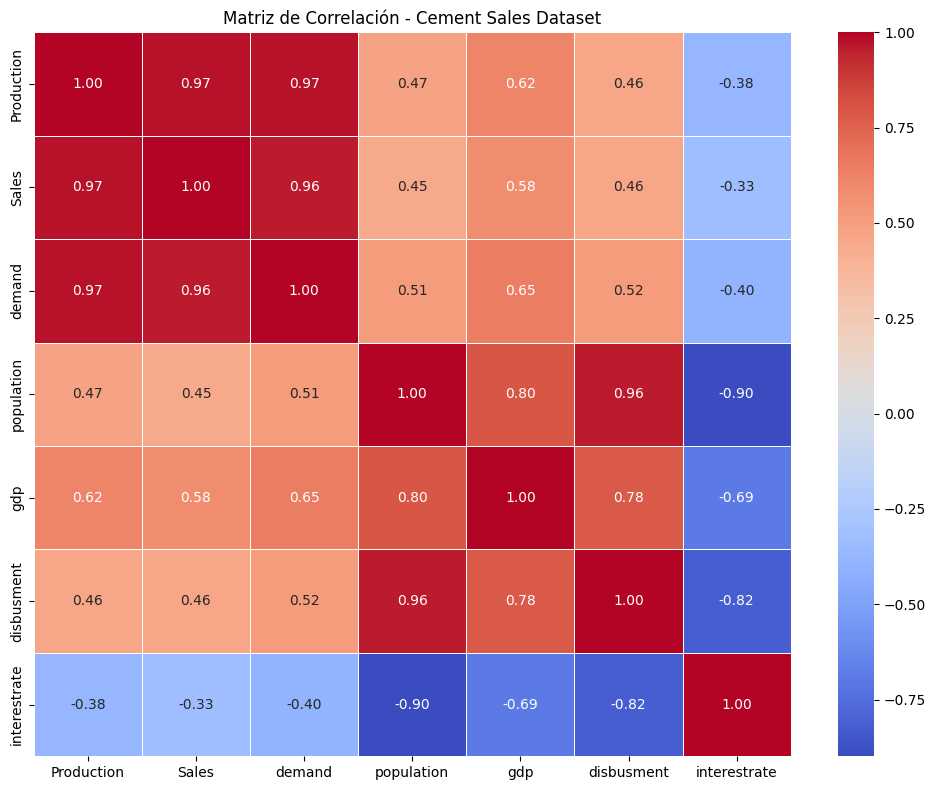

In [12]:
# Solo variables numéricas
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlación - Cement Sales Dataset')
plt.tight_layout()
plt.show()

### Análisis de Correlación
Se construyó una matriz de correlación utilizando únicamente variables numéricas del conjunto de datos. La visualización permite identificar las relaciones lineales existentes entre la producción, ventas, demanda de cemento y variables macroeconómicas.

🔹 Correlaciones entre variables operativas

Existe una correlación positiva muy alta entre:

Production y Sales (r = 0.97)

Production y Demand (r = 0.97)

Sales y Demand (r = 0.96)

Esto indica que estas variables están estrechamente relacionadas y podrían considerarse colineales, lo cual es importante tener en cuenta en el modelado para evitar redundancia.

🔹 Correlaciones con variables macroeconómicas

GDP (Producto Interno Bruto) tiene una correlación moderada-alta con la demand (r = 0.65) y la production (r = 0.62), lo que sugiere que el comportamiento económico del país incide directamente en el consumo de cemento.

Population también se correlaciona con demand (r = 0.51), lo que es lógico dado que el crecimiento poblacional está asociado al desarrollo urbano.

Disbursement (desembolsos) tiene una correlación de 0.52 con la demand, lo cual podría reflejar inversiones públicas o privadas en infraestructura.

🔹 Tasa de interés

Se observa una correlación negativa significativa entre interest_rate y:

Population (r = -0.90)

Disbursement (r = -0.82)

GDP (r = -0.69)

Demand (r = -0.40)

Esto sugiere que tasas de interés más altas están asociadas con una menor inversión, menor crecimiento económico y menor demanda de cemento, probablemente por la reducción en la construcción y el crédito.

-  Conclusión

Las variables gdp, disbursement, population e interest_rate muestran potencial como predictores de la demanda de cemento. Adicionalmente, la alta colinealidad entre production, sales y demand sugiere que solo una de estas variables debería usarse como variable objetivo o predictor para evitar sobreajuste en los modelos.



In [14]:
df.columns

Index(['Month', 'Production', 'Sales', 'demand', 'population', 'gdp',
       'disbusment', 'interestrate'],
      dtype='object')

In [15]:
df = df.drop(columns=['demand', 'Production'])

In [16]:
df.describe()

,Month,Sales,population,gdp,disbusment,interestrate
count,155,155.000000,155.000000,155.000000,155.000000,155.000000
mean,2016-05-31 20:35:36.774193664,432.696774,132.676774,225938.397032,136477.408194,9.472710
min,2010-01-01 00:00:00,152.000000,122.400000,131437.053000,60314.000000,7.000000
25%,2013-03-16 12:00:00,313.500000,127.800000,198254.490000,95231.040000,8.110000
50%,2016-06-01 00:00:00,400.000000,132.900000,224842.983000,150587.040000,9.230000
75%,2019-08-16 12:00:00,523.000000,137.750000,252742.619000,163955.765000,10.570000
max,2022-11-01 00:00:00,895.000000,141.700000,338282.980000,236163.040000,13.250000
std,NaN,164.812935,5.740105,35283.418396,46921.994709,1.629669


# Random Forest